<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/rosenbrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rosenbrock Function (Test Functions for Optimization)**

In [0]:
import tensorflow as tf
import datetime, os
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import math 

print(tf.__version__)

2.2.0


List of Optimization Algorithms<br>
https://en.m.wikipedia.org/wiki/List_of_algorithms#Optimization_algorithms

List of Test Functions for Optimization <br> https://en.m.wikipedia.org/wiki/Test_functions_for_optimization

## **Rosenbrock**

**Rosenbrock**'s function and **Himmelblau**'s function are comonly used to test optimization algorithms. We shall use them all along. You can find other functions to test [here](https://en.wikipedia.org/wiki/Test_functions_for_optimization). Source: [Omar Aflak](https://www.medium.com/@omaraflak)

https://en.wikipedia.org/wiki/Rosenbrock_function

$f(x,y) = (a - x)^2 + b * (y - x^2)^2$

It has a global minimum at $(x,y)=(a,a^2)$, where $f(x,y)=0$.

In [0]:
def rosenbrock(X, a=1, b=100):
    x, y = X
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(X, a=1, b=100):
    x, y = X
    return np.array([
        2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

def rosenbrock_hess(X, a=1, b=100):
    x, y = X
    return np.matrix([
        [2 - 4 * b * (y - 3 * x**2), -4 * b * x],
        [-4 * b * x, 2 * b]
    ])

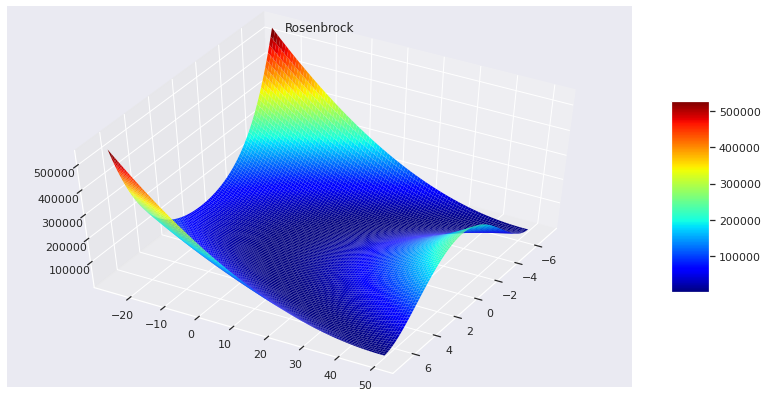

In [0]:
x = np.linspace(-7, 7, 100)
y = np.linspace(-25, 50, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock((X, Y))

fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection='3d')
ax.set_title('Rosenbrock')
ax.view_init(elev=50., azim=30)
rosenbrock = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
fig.colorbar(rosenbrock, shrink=0.5, aspect=5)

## **Derivative Directions**

### **Newton's direction**

$
d = - H_f^{-1}(x) \cdot \nabla_xf(x) \\
H_f(x) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}, \quad
\nabla_xf(x) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$


In [0]:
def newton(J_grad, J_hess, x_init, epsilon=1e-10, max_iterations=1000):
    x = x_init
    for i in range(max_iterations):
        x = x - np.linalg.solve(J_hess(x), J_grad(x))
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    return x, max_iterations

In [0]:
# The Rosenbrock function takes 2 inputs
x_init = np.zeros(2)
x_min, it = newton(rosenbrock_grad, rosenbrock_hess, x_init)
print('x* =', x_min)
#print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

x* = [1. 1.]
Grad Rosenbrock(x*) = [0. 0.]
Iterations = 2


### **Gradient's direction**

$
d = - \nabla_xf(x) \\
\nabla_xf(x) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$

In [0]:
def gradient_descent(J_grad, x_init, alpha=0.01, epsilon=1e-10, max_iterations=1000):
    x = x_init
    for i in range(max_iterations):
        x = x - alpha * J_grad(x)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    return x, max_iterations

In [0]:
# Rosenbrock takes 2 input variables that we set to 0 at first
x_init = np.zeros(2)
x_min, it = gradient_descent(rosenbrock_grad, x_init, alpha=0.002, max_iterations=5000)
print('x* =', x_min)
# print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

x* = [0.99440769 0.98882419]
Grad Rosenbrock(x*) = [-0.00225342 -0.00449072]
Iterations = 5000


### **Gradient's direction + Optimal step size**

$
d = - \alpha \nabla_xf(x) \\
\nabla_xf(x) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}, \quad \alpha \in {\Bbb R}
$

$\alpha$ is the step size, usually in the range $[0,1]$. Unlike the usual gradient descent, here we want to find the optimal $\alpha$ at every iteration. Since at every step, the update is:

$x_{k+1} = x_k - \alpha \nabla_xf(x_k)$

We want to make sure, that the chosen $\alpha$ is going to minimize as much as possible the target function $f$. Therefore, we want $\alpha$ to be such that:

$\alpha_k = \underset{\alpha}{argmin} f(x_k - \alpha \nabla_xf(x_k))$

Since at iteration $k$, $x_k$ and $\nabla_xf(x_k)$ are constants, we can define $q(\alpha)$:

$q(\alpha) = f(x_k - \alpha \nabla_xf(x_k))$

that is a function of one variable, $\alpha$. Therefore, we want to find the right $\alpha$ that will minimize $q$. That task can be solved for instance using gradient descent itself, but since we know that $/alpha$ is bounded, we are going to use another algorithm more suited for this task: Golden Section Search.

https://en.wikipedia.org/wiki/Golden-section_search

In [0]:
def gss(f, a, b, tol=1e-7):
    phi = (np.sqrt(5) + 1) / 2
    d = b - (b - a) / phi
    c = a + (b - a) / phi

    while abs(d - c) > tol:
        if f(d) < f(c):
            b = c
        else:
            a = d

        d = b - (b - a) / phi
        c = a + (b - a) / phi

    return (a + b) / 2

def gradient_descent_optimal(J, J_grad, x_init, epsilon=1e-10, max_iterations=1000):
    x = x_init
    for i in range(max_iterations):
        q = lambda alpha: J(x - alpha * J_grad(x))
        alpha = gss(q, 0, 1)
        x = x - alpha * J_grad(x)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    return x, max_iterations

In [0]:
# The Rosenbrock function takes 2 inputs
x_init = np.zeros(2)
# x_min, it = gradient_descent_optimal(rosenbrock, rosenbrock_grad, x_init, max_iterations=3000)
print('x* =', x_min)
# print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

x* = [3. 2.]
Grad Rosenbrock(x*) = [ 8403.99999998 -1400.        ]
Iterations = 93
